# CO2-Emissions Prediction Task
##### The ability to accurately monitor carbon emissions is a critical step in the fight against climate change. Precise carbon readings allow researchers and governments to understand the sources and patterns of carbon mass output. While Europe and North America have extensive systems in place to monitor carbon emissions on the ground, there are few available in Africa.

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline


## Data Exploration

In [2]:
# creating training and testing data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
# merging training and testing data
df = df_train[:]

In [4]:
df.head()

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0  ID_-0.510_29.290_2019_00     -0.51      29.29  2019        0   
1  ID_-0.510_29.290_2019_01     -0.51      29.29  2019        1   
2  ID_-0.510_29.290_2019_02     -0.51      29.29  2019        2   
3  ID_-0.510_29.290_2019_03     -0.51      29.29  2019        3   
4  ID_-0.510_29.290_2019_04     -0.51      29.29  2019        4   

   SulphurDioxide_SO2_column_number_density  \
0                                 -0.000108   
1                                  0.000021   
2                                  0.000514   
3                                       NaN   
4                                 -0.000079   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                      0.603019   
1                                      0.728214   
2                                      0.748199   
3                                           NaN   
4                                      0.676296   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                       -0.000065   
1                                        0.000014   
2                                        0.000385   
3                                             NaN   
4                                       -0.000048   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  ...  \
0                       0.255668                           -98.593887  ...   
1                       0.130988                            16.592861  ...   
2                       0.110018                            72.795837  ...   
3                            NaN                                  NaN  ...   
4                       0.121164                             4.121269  ...   

   Cloud_cloud_top_height  Cloud_cloud_base_pressure  Cloud_cloud_base_height  \
0             3664.436218               61085.809570              2615.120483   
1             3651.190311               66969.478735              3174.572424   
2             4216.986492               60068.894448              3516.282669   
3             5228.507736               51064.547339              4180.973322   
4             3980.598120               63751.125781              3355.710107   

   Cloud_cloud_optical_depth  Cloud_surface_albedo  \
0                  15.568533              0.272292   
1                   8.690601              0.256830   
2                  21.103410              0.251101   
3                  15.386899              0.262043   
4                   8.114694              0.235847   

   Cloud_sensor_azimuth_angle  Cloud_sensor_zenith_angle  \
0                  -12.628986                  35.632416   
1                   30.359375                  39.557633   
2                   15.377883                  30.401823   
3                  -11.293399                  24.380357   
4                   38.532263                  37.392979   

   Cloud_solar_azimuth_angle  Cloud_solar_zenith_angle  emission  
0                -138.786423                 30.752140  3.750994  
1                -145.183930                 27.251779  4.025176  
2                -142.519545                 26.193296  4.231381  
3                -132.665828                 28.829155  4.305286  
4                -141.509805                 22.204612  4.347317  

[5 rows x 76 columns]

In [5]:
# drop id
df.drop('ID_LAT_LON_YEAR_WEEK', axis=1, inplace=True)
df.head()

C:\Users\CompuMart\AppData\Local\Temp\ipykernel_5188\1570590765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('ID_LAT_LON_YEAR_WEEK', axis=1, inplace=True)


latitude  longitude  year  week_no  \
0     -0.51      29.29  2019        0   
1     -0.51      29.29  2019        1   
2     -0.51      29.29  2019        2   
3     -0.51      29.29  2019        3   
4     -0.51      29.29  2019        4   

   SulphurDioxide_SO2_column_number_density  \
0                                 -0.000108   
1                                  0.000021   
2                                  0.000514   
3                                       NaN   
4                                 -0.000079   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                      0.603019   
1                                      0.728214   
2                                      0.748199   
3                                           NaN   
4                                      0.676296   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                       -0.000065   
1                                        0.000014   
2                                        0.000385   
3                                             NaN   
4                                       -0.000048   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
0                       0.255668                           -98.593887   
1                       0.130988                            16.592861   
2                       0.110018                            72.795837   
3                            NaN                                  NaN   
4                       0.121164                             4.121269   

   SulphurDioxide_sensor_zenith_angle  ...  Cloud_cloud_top_height  \
0                           50.843559  ...             3664.436218   
1                           39.137194  ...             3651.190311   
2                           52.868816  ...             4216.986492   
3                                 NaN  ...             5228.507736   
4                           35.515587  ...             3980.598120   

   Cloud_cloud_base_pressure  Cloud_cloud_base_height  \
0               61085.809570              2615.120483   
1               66969.478735              3174.572424   
2               60068.894448              3516.282669   
3               51064.547339              4180.973322   
4               63751.125781              3355.710107   

   Cloud_cloud_optical_depth  Cloud_surface_albedo  \
0                  15.568533              0.272292   
1                   8.690601              0.256830   
2                  21.103410              0.251101   
3                  15.386899              0.262043   
4                   8.114694              0.235847   

   Cloud_sensor_azimuth_angle  Cloud_sensor_zenith_angle  \
0                  -12.628986                  35.632416   
1                   30.359375                  39.557633   
2                   15.377883                  30.401823   
3                  -11.293399                  24.380357   
4                   38.532263                  37.392979   

   Cloud_solar_azimuth_angle  Cloud_solar_zenith_angle  emission  
0                -138.786423                 30.752140  3.750994  
1                -145.183930                 27.251779  4.025176  
2                -142.519545                 26.193296  4.231381  
3                -132.665828                 28.829155  4.305286  
4                -141.509805                 22.204612  4.347317  

[5 rows x 75 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 75 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   latitude                                                  79023 non-null  float64
 1   longitude                                                 79023 non-null  float64
 2   year                                                      79023 non-null  int64  
 3   week_no                                                   79023 non-null  int64  
 4   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 5   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 6   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 7   SulphurDioxide_cloud_fraction                             64414 non-null  float64
 8   SulphurDioxide_s

#### We figured no categorical data to convert, yet we still have to check for missing values

In [7]:
# check for null values
df.isnull().sum()

latitude                                        0
longitude                                       0
year                                            0
week_no                                         0
SulphurDioxide_SO2_column_number_density    14609
                                            ...  
Cloud_sensor_azimuth_angle                    484
Cloud_sensor_zenith_angle                     484
Cloud_solar_azimuth_angle                     484
Cloud_solar_zenith_angle                      484
emission                                        0
Length: 75, dtype: int64

In [8]:
# fillna null values with 0 
df.fillna(0, inplace=True)
df_filled = df[:]
print(df_filled)

       latitude  longitude  year  week_no  \
0        -0.510     29.290  2019        0   
1        -0.510     29.290  2019        1   
2        -0.510     29.290  2019        2   
3        -0.510     29.290  2019        3   
4        -0.510     29.290  2019        4   
...         ...        ...   ...      ...   
79018    -3.299     30.301  2021       48   
79019    -3.299     30.301  2021       49   
79020    -3.299     30.301  2021       50   
79021    -3.299     30.301  2021       51   
79022    -3.299     30.301  2021       52   

       SulphurDioxide_SO2_column_number_density  \
0                                     -0.000108   
1                                      0.000021   
2                                      0.000514   
3                                      0.000000   
4                                     -0.000079   
...                                         ...   
79018                                  0.000284   
79019                                  0.000083   


C:\Users\CompuMart\AppData\Local\Temp\ipykernel_5188\2667916636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(0, inplace=True)


In [9]:
df_filled.isnull().sum()

latitude                                    0
longitude                                   0
year                                        0
week_no                                     0
SulphurDioxide_SO2_column_number_density    0
                                           ..
Cloud_sensor_azimuth_angle                  0
Cloud_sensor_zenith_angle                   0
Cloud_solar_azimuth_angle                   0
Cloud_solar_zenith_angle                    0
emission                                    0
Length: 75, dtype: int64

#### Now we dealt with all the null values let's proceed exploring the data

In [10]:
df_filled.describe()

latitude     longitude          year       week_no  \
count  79023.000000  79023.000000  79023.000000  79023.000000   
mean      -1.891072     29.880155   2020.000000     26.000000   
std        0.694522      0.810375      0.816502     15.297155   
min       -3.299000     28.228000   2019.000000      0.000000   
25%       -2.451000     29.262000   2019.000000     13.000000   
50%       -1.882000     29.883000   2020.000000     26.000000   
75%       -1.303000     30.471000   2021.000000     39.000000   
max       -0.510000     31.532000   2021.000000     52.000000   

       SulphurDioxide_SO2_column_number_density  \
count                              79023.000000   
mean                                   0.000039   
std                                    0.000246   
min                                   -0.000996   
25%                                   -0.000065   
50%                                    0.000000   
75%                                    0.000117   
max                                    0.004191   

       SulphurDioxide_SO2_column_number_density_amf  \
count                                  79023.000000   
mean                                       0.680509   
std                                        0.364751   
min                                        0.000000   
25%                                        0.604531   
50%                                        0.762808   
75%                                        0.905362   
max                                        1.885239   

       SulphurDioxide_SO2_slant_column_number_density  \
count                                    79023.000000   
mean                                         0.000029   
std                                          0.000186   
min                                         -0.000887   
25%                                         -0.000053   
50%                                          0.000000   
75%                                          0.000093   
max                                          0.004236   

       SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
count                   79023.000000                         79023.000000   
mean                        0.129131                            -6.460613   
std                         0.089068                            58.101325   
min                         0.000000                          -179.537059   
25%                         0.049481                           -41.806629   
50%                         0.140023                             0.000000   
75%                         0.199492                            30.969258   
max                         0.299998                           122.095200   

       SulphurDioxide_sensor_zenith_angle  ...  Cloud_cloud_top_height  \
count                        79023.000000  ...            79023.000000   
mean                            30.515352  ...             5558.125290   
std                             19.349423  ...             1489.463877   
min                              0.000000  ...                0.000000   
25%                             16.574081  ...             4574.146003   
50%                             34.097309  ...             5563.087848   
75%                             44.906770  ...             6534.822189   
max                             66.242012  ...            12384.239458   

       Cloud_cloud_base_pressure  Cloud_cloud_base_height  \
count               79023.000000             79023.000000   
mean                59056.360071              4641.825418   
std                 10144.697147              1403.221989   
min                     0.000000                 0.000000   
25%                 53040.596343              3660.259169   
50%                 59255.784608              4610.696783   
75%                 65612.718663              5566.268062   
max                 89291.615576             11384.239458   

       Cloud_cloud_optical_depth  Cloud_surf

#### "emission" is our target (label) column

In [11]:
# checking correlation between features and sorting
corr = df_filled.corr()
corr_emission = corr['emission'].sort_values(ascending=False)
corr_emission

emission                                                    1.000000
longitude                                                   0.102746
Cloud_surface_albedo                                        0.041621
Formaldehyde_tropospheric_HCHO_column_number_density_amf    0.031055
NitrogenDioxide_cloud_fraction                              0.020300
                                                              ...   
NitrogenDioxide_solar_azimuth_angle                        -0.025655
CarbonMonoxide_solar_azimuth_angle                         -0.027449
SulphurDioxide_solar_azimuth_angle                         -0.028240
Formaldehyde_solar_azimuth_angle                           -0.030086
CarbonMonoxide_H2O_column_number_density                   -0.032808
Name: emission, Length: 75, dtype: float64

In [12]:
# take all features 
features = corr_emission[:].index
features

Index(['emission', 'longitude', 'Cloud_surface_albedo',
       'Formaldehyde_tropospheric_HCHO_column_number_density_amf',
       'NitrogenDioxide_cloud_fraction', 'latitude',
       'SulphurDioxide_cloud_fraction',
       'SulphurDioxide_SO2_column_number_density_amf',
       'NitrogenDioxide_solar_zenith_angle',
       'SulphurDioxide_solar_zenith_angle', 'CarbonMonoxide_sensor_altitude',
       'UvAerosolIndex_sensor_azimuth_angle',
       'NitrogenDioxide_sensor_altitude', 'Ozone_sensor_azimuth_angle',
       'Cloud_sensor_azimuth_angle', 'NitrogenDioxide_tropopause_pressure',
       'UvAerosolIndex_absorbing_aerosol_index',
       'Formaldehyde_solar_zenith_angle', 'Formaldehyde_cloud_fraction',
       'week_no', 'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide_NO2_column_number_density',
       'SulphurDioxide_sensor_zenith_angle',
       'NitrogenDioxide_stratospheric_NO2_column_number_density',
       'NitrogenDioxide_absorbing_aerosol_index',
 

#### Plotting Correlation using heatmap

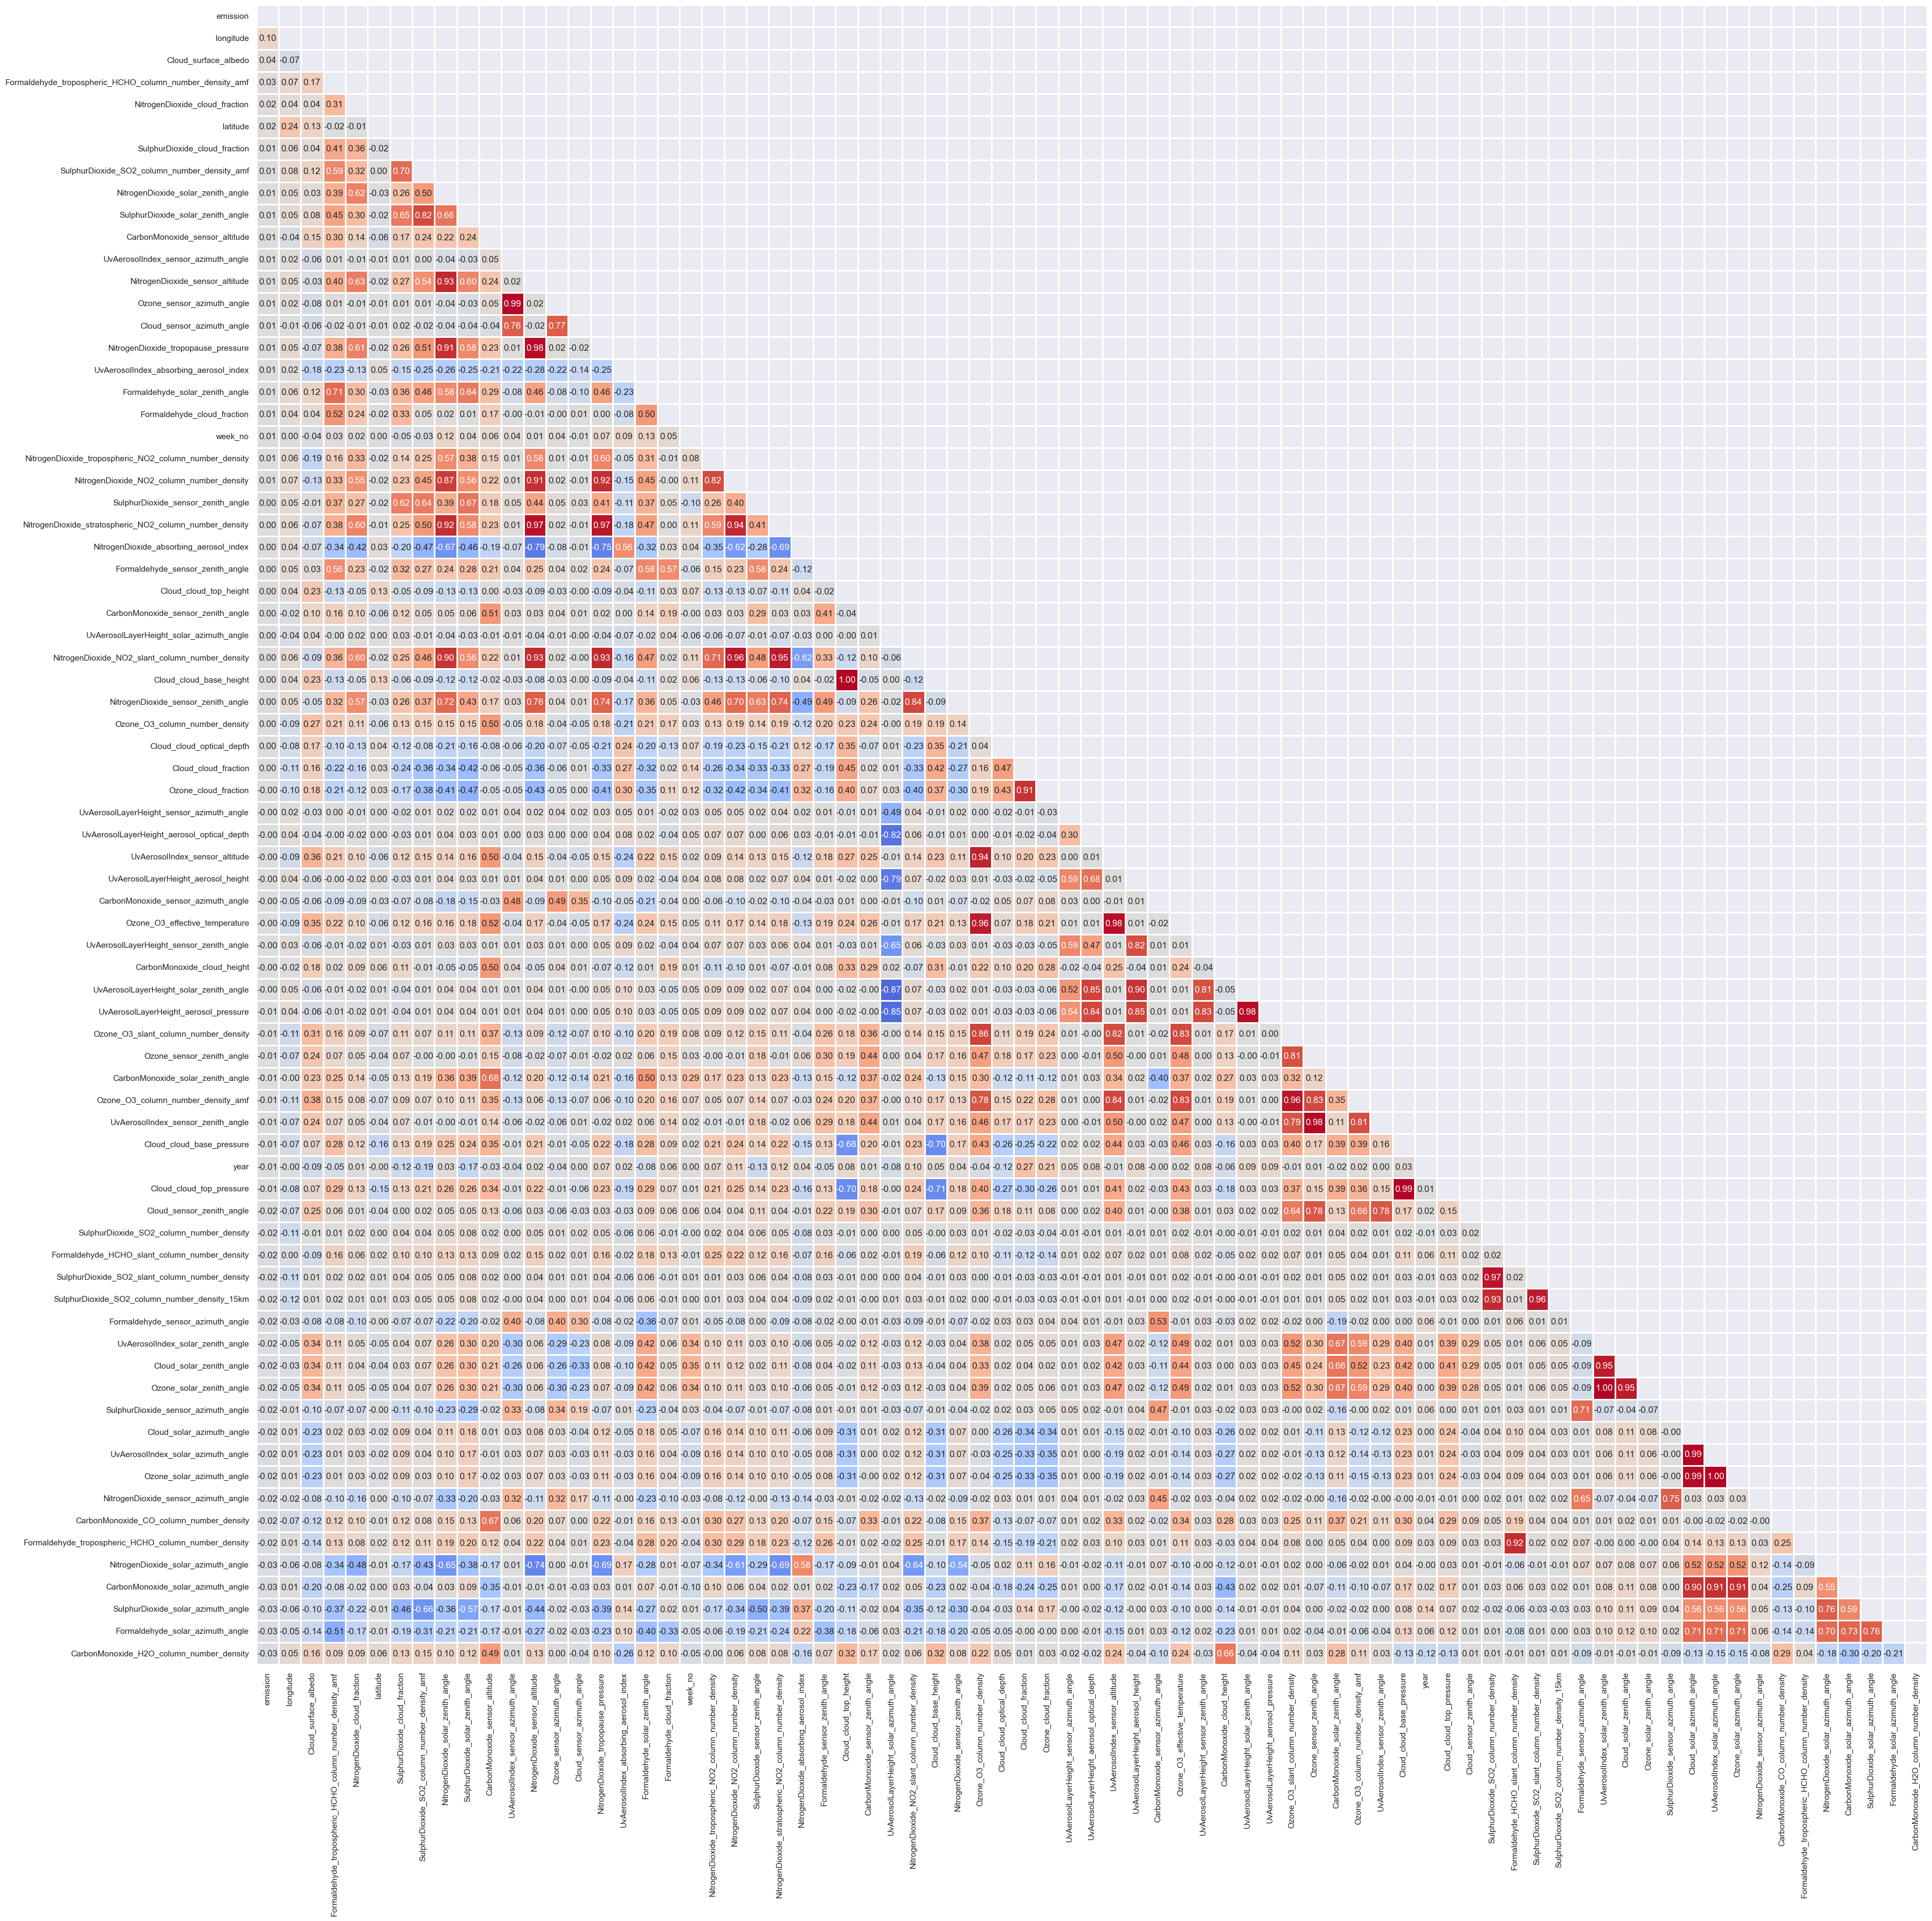

In [13]:
# create a mask for the upper triangle
mask = np.zeros_like(df_filled[features].corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
# heatmap to show the correlation between features
plt.figure(figsize=(40, 40))
sns.set(font_scale=1)
sns.heatmap(df_filled[features].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2, vmin=-1, vmax=1, mask=mask, cbar=False)
plt.show()

#### Plotting each feature against emission

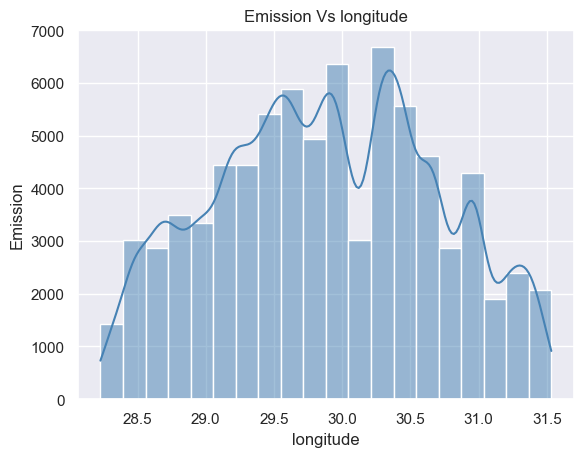

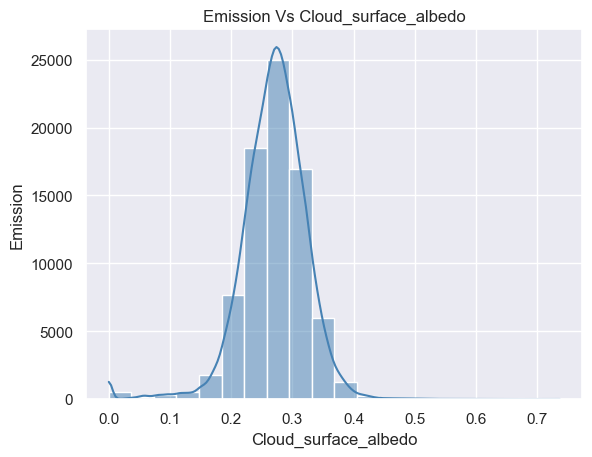

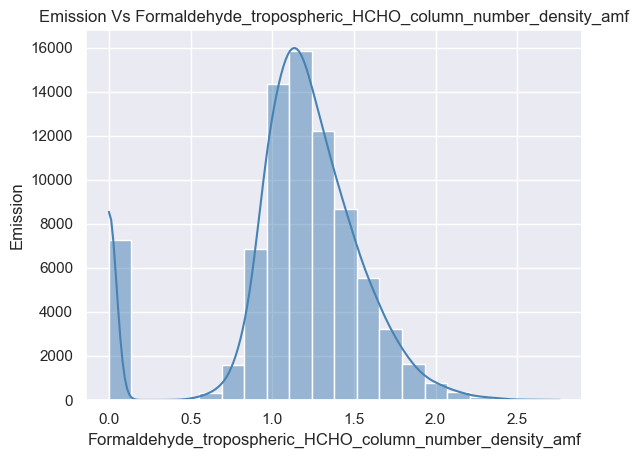

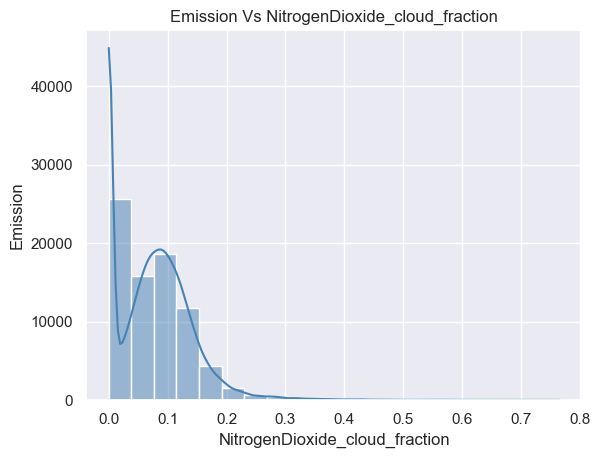

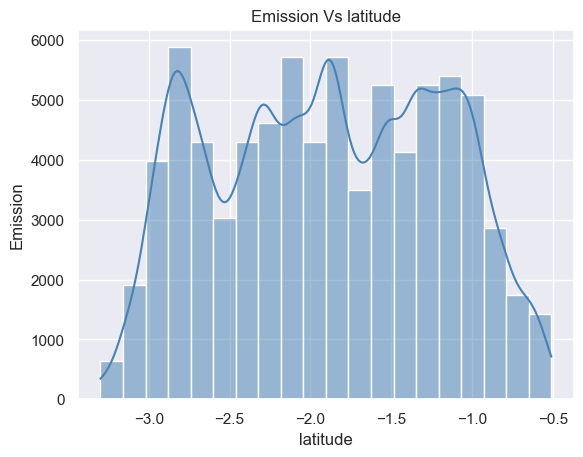

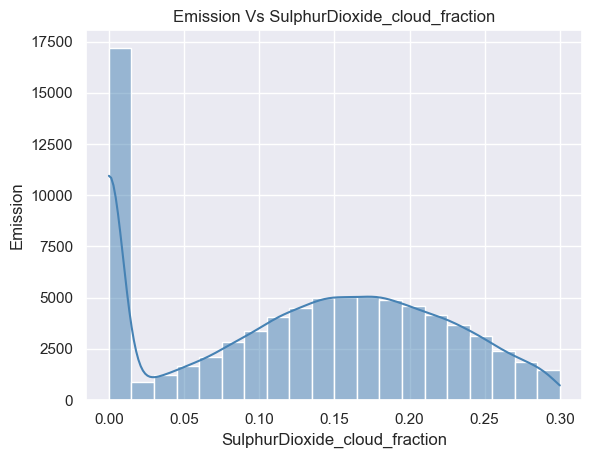

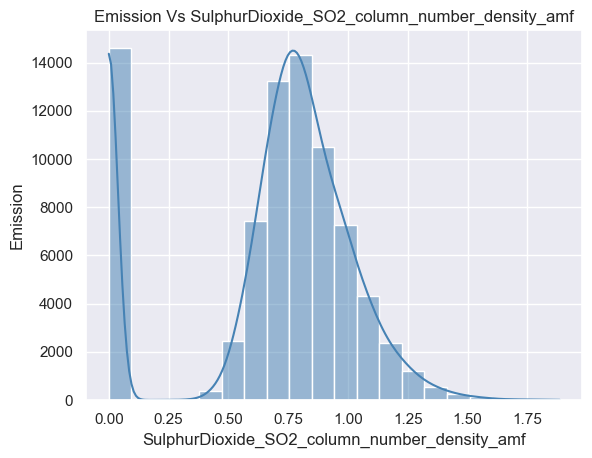

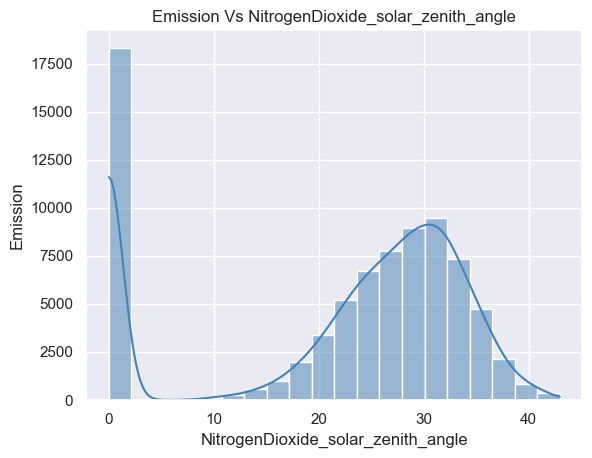

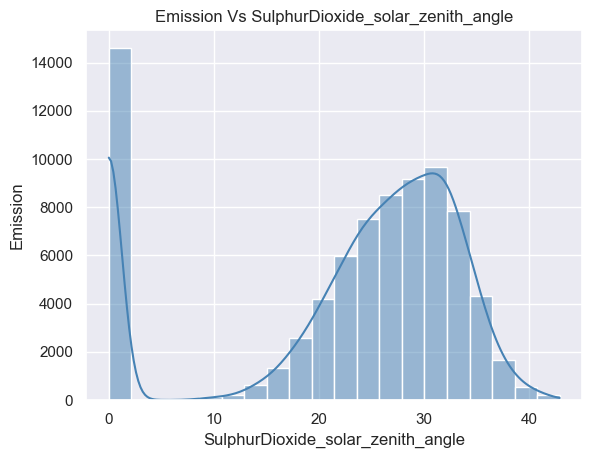

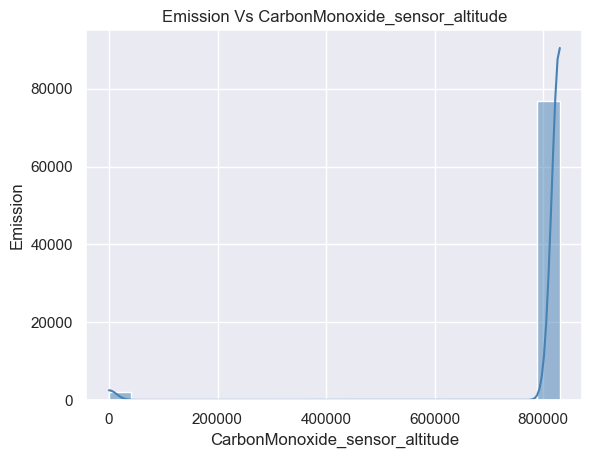

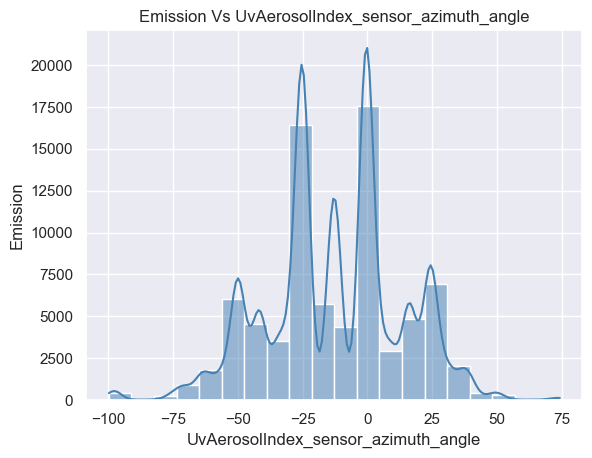

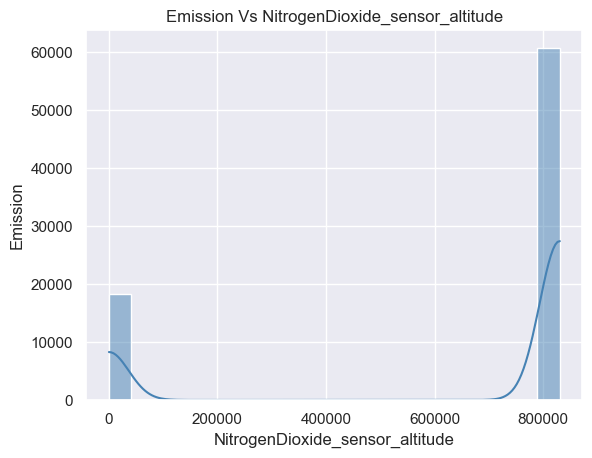

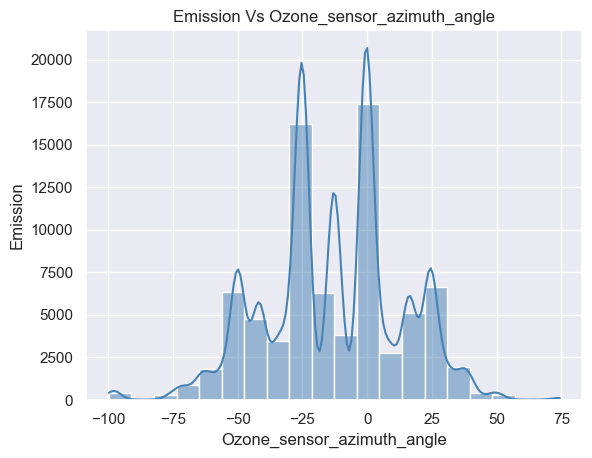

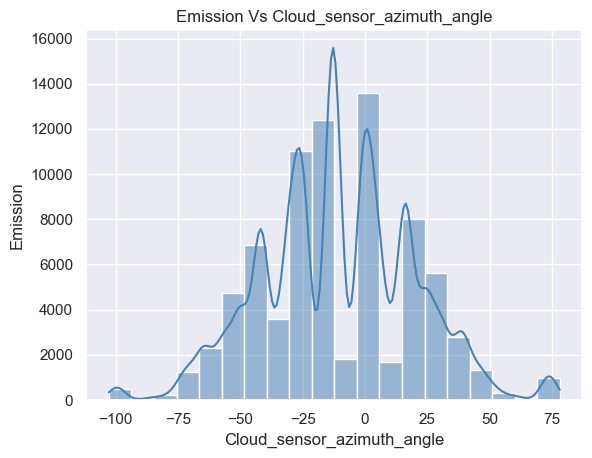

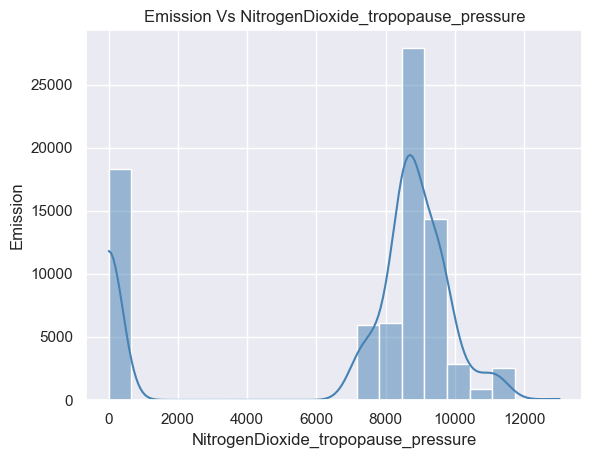

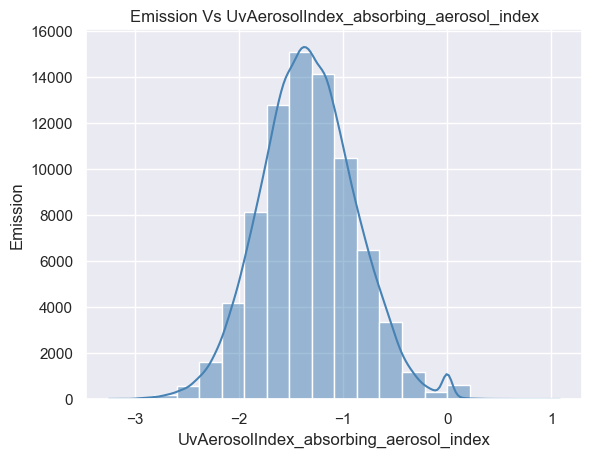

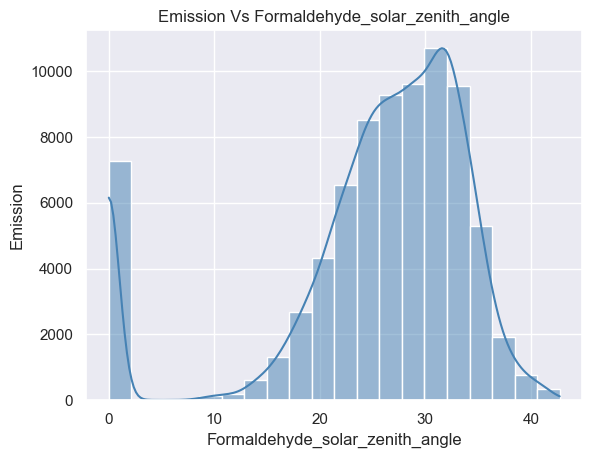

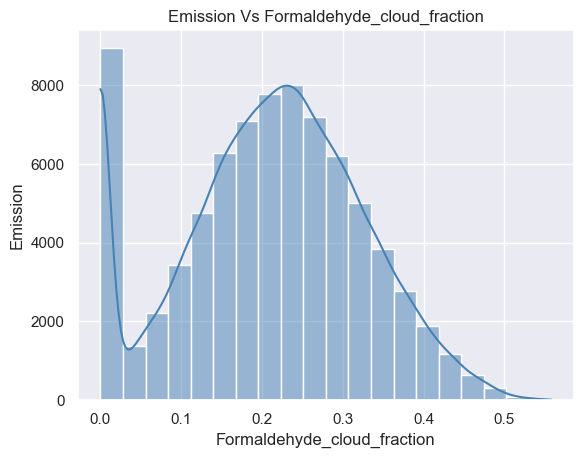

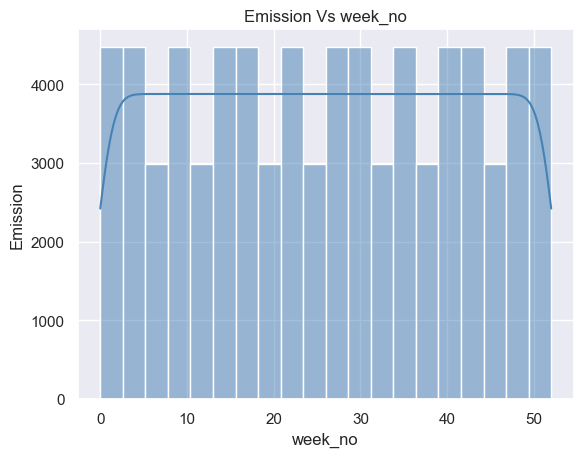

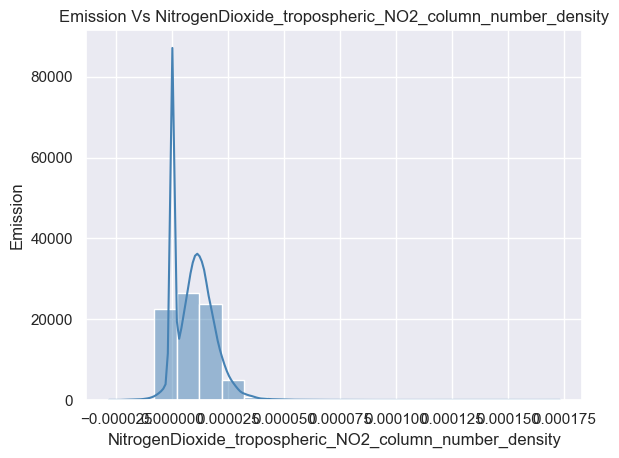

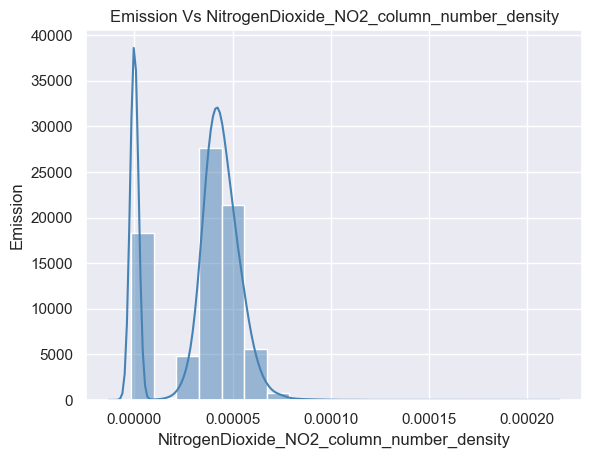

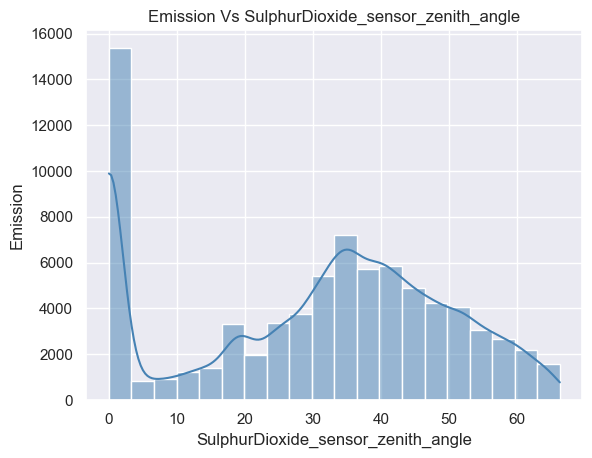

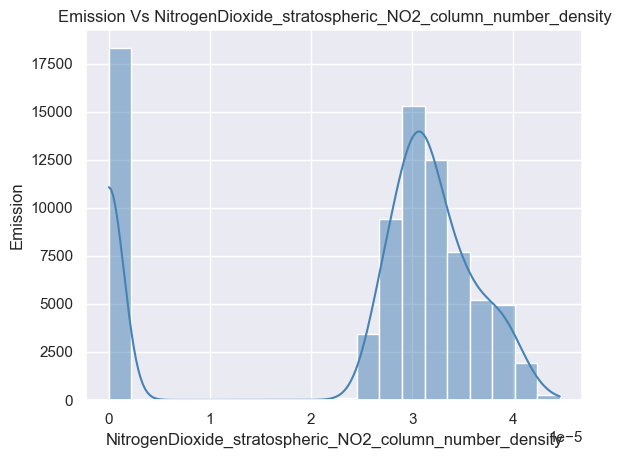

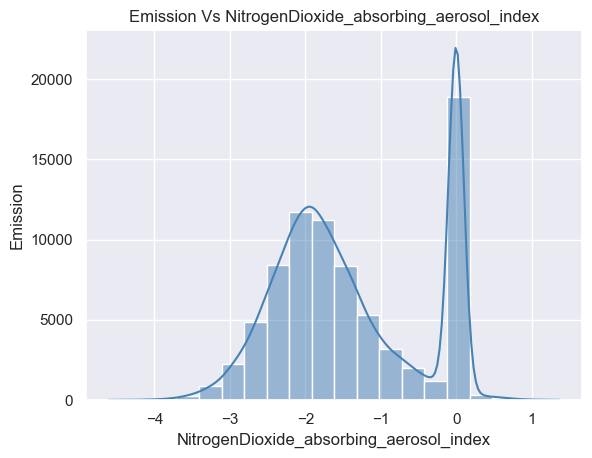

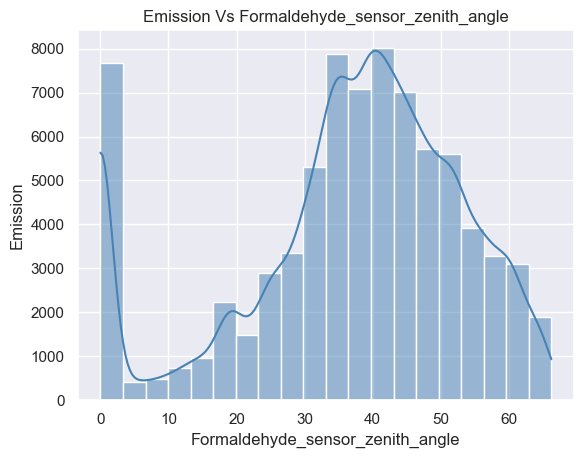

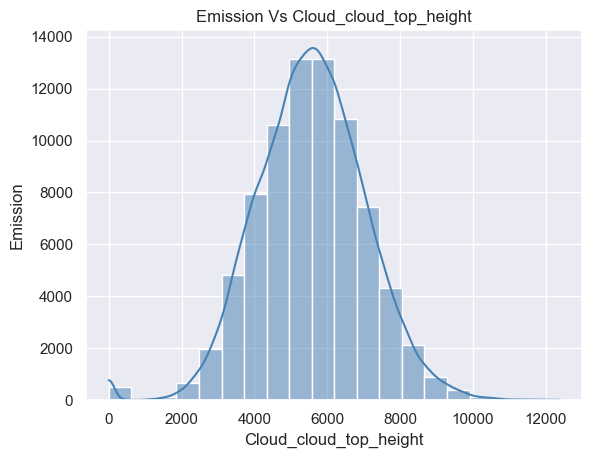

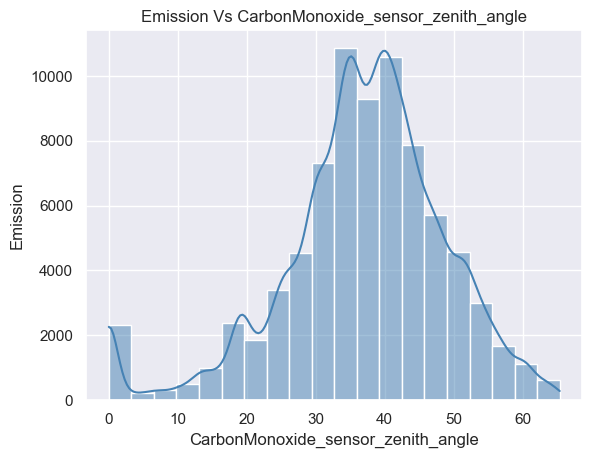

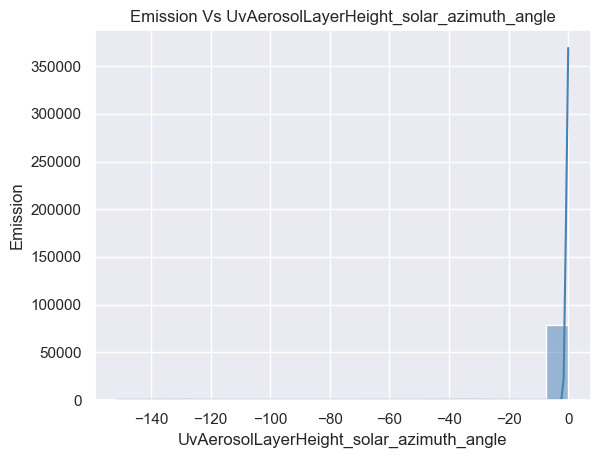

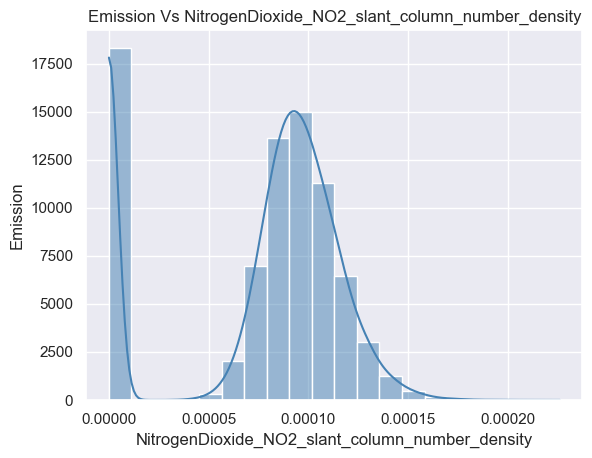

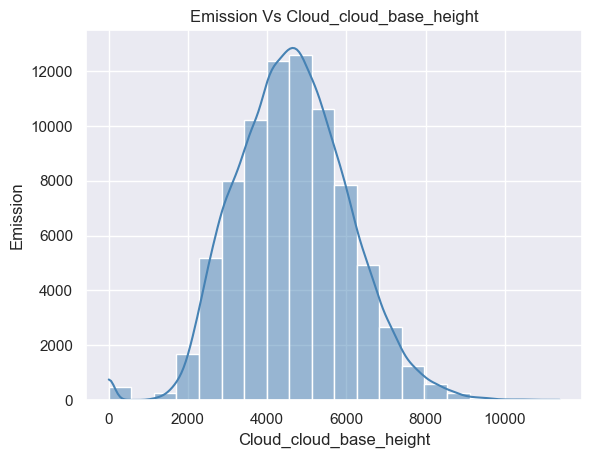

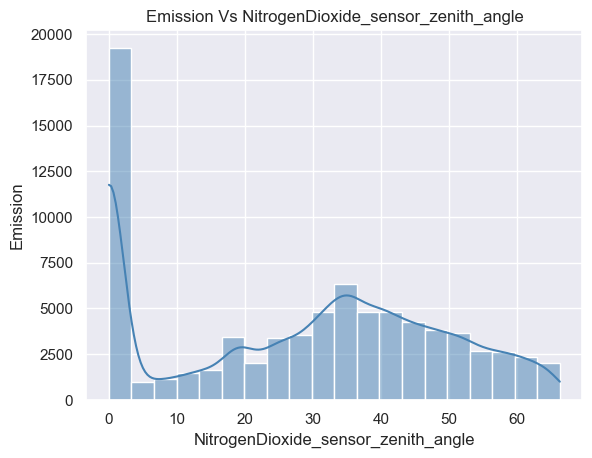

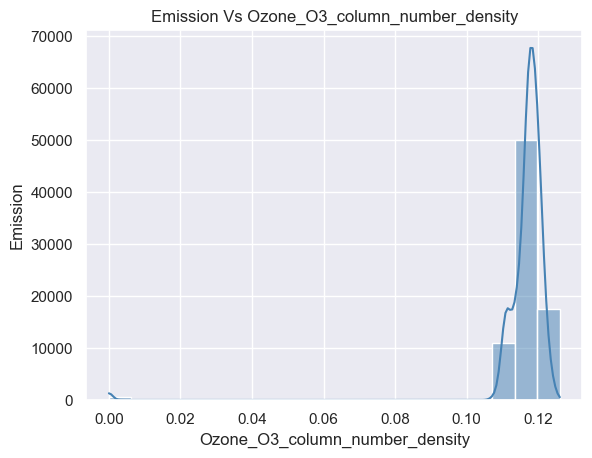

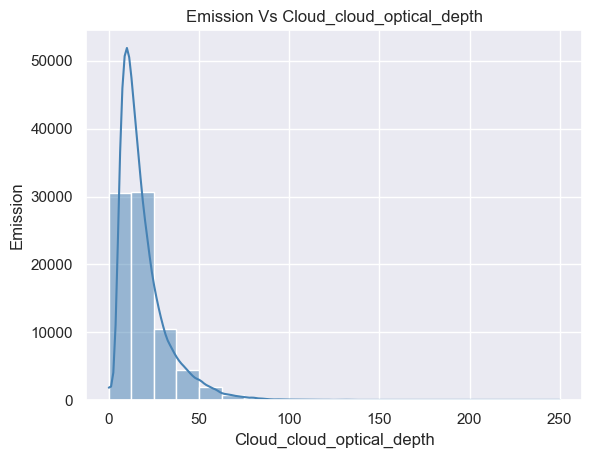

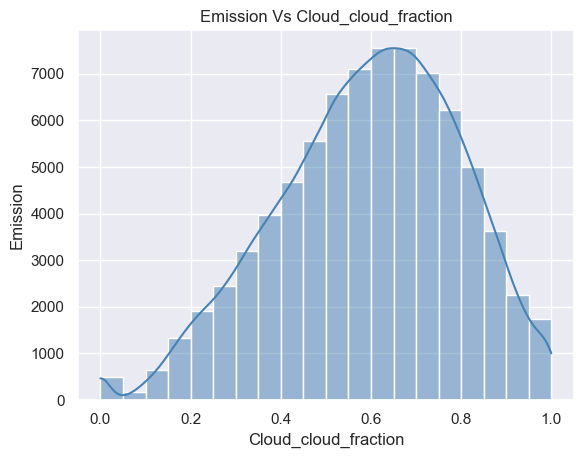

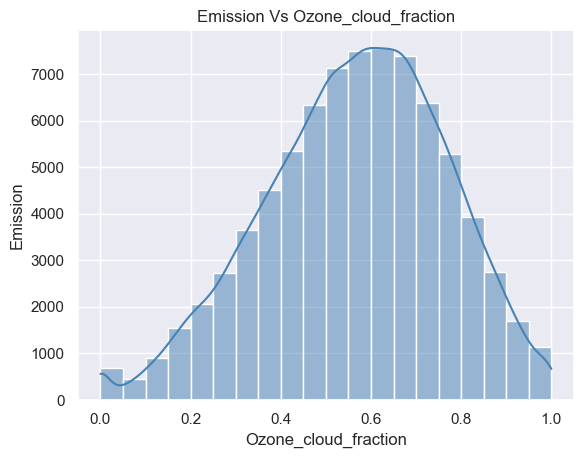

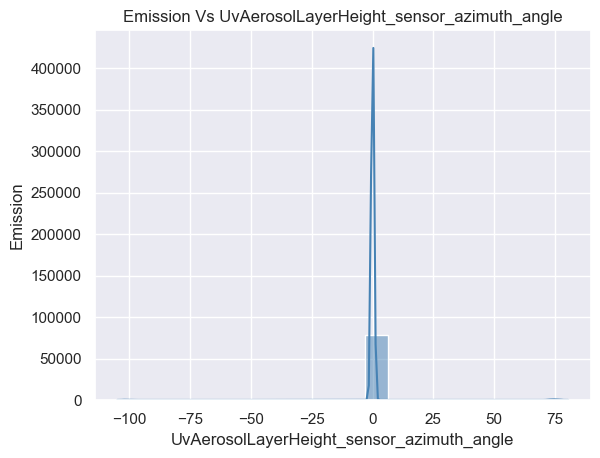

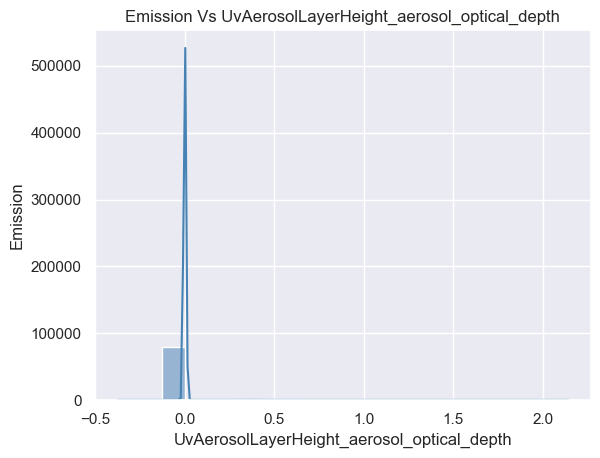

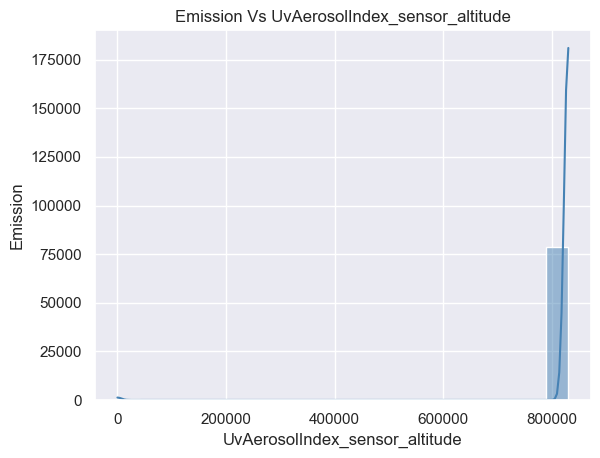

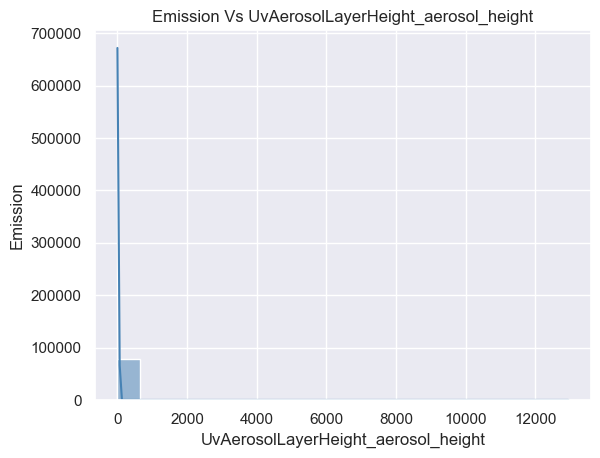

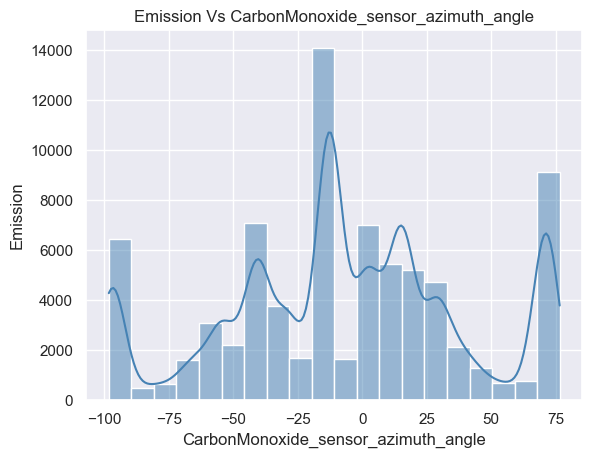

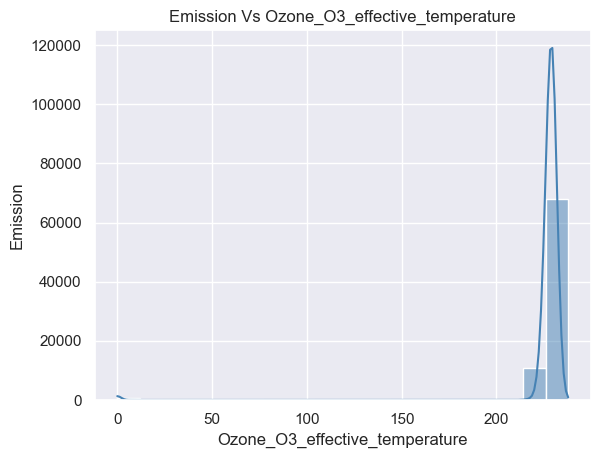

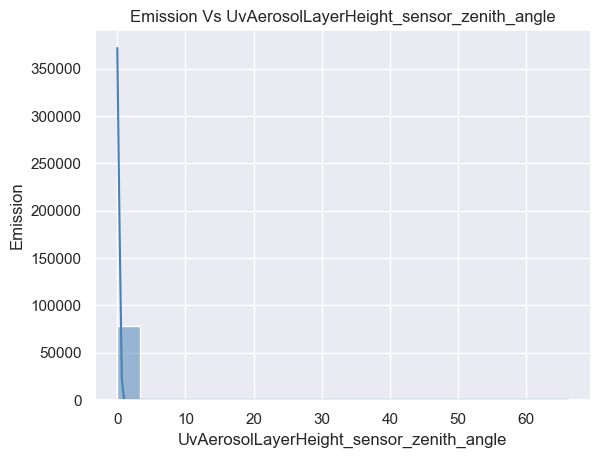

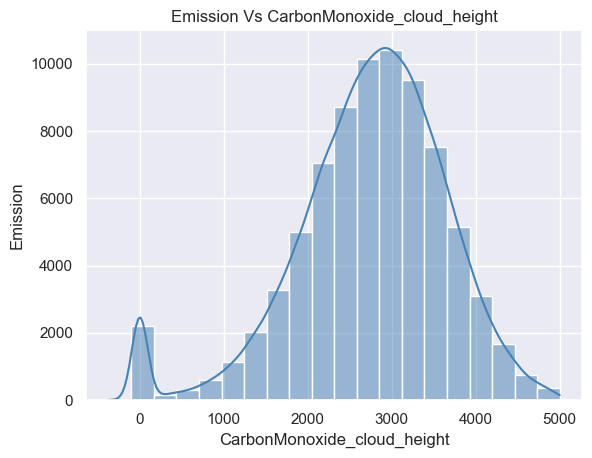

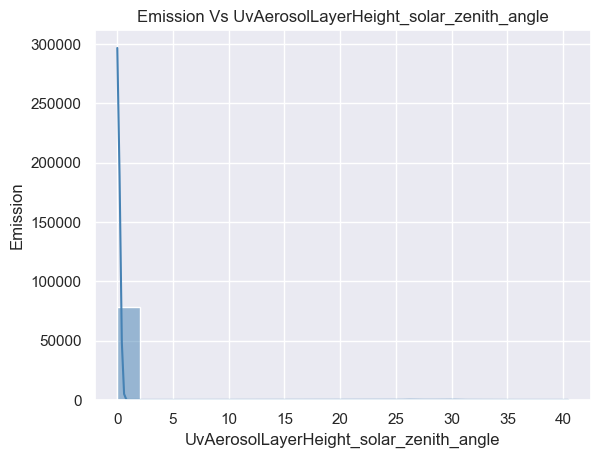

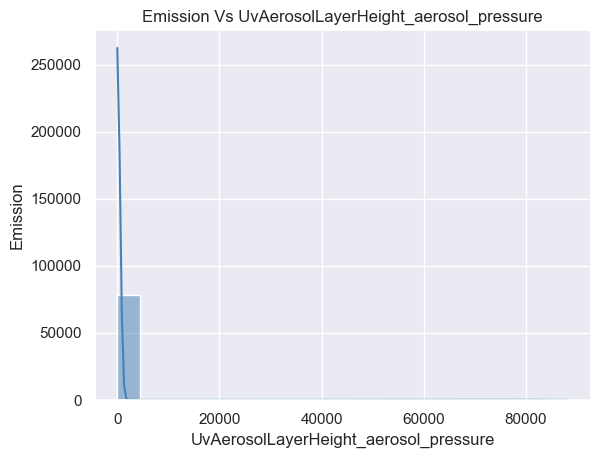

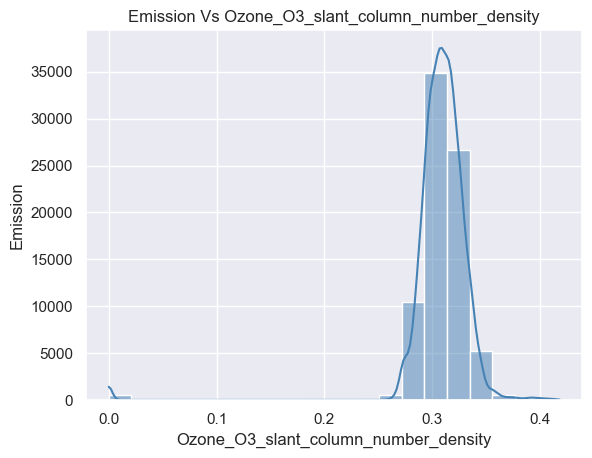

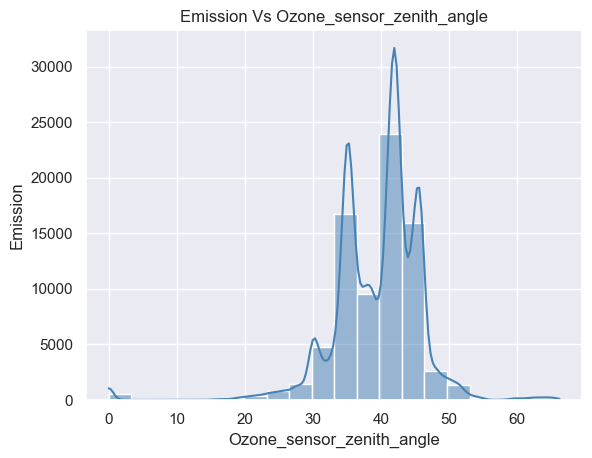

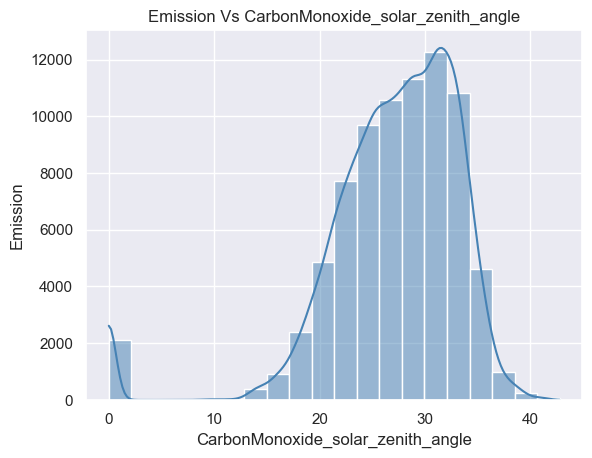

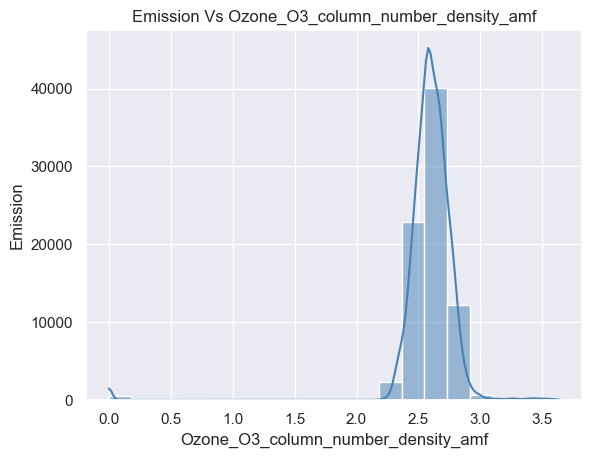

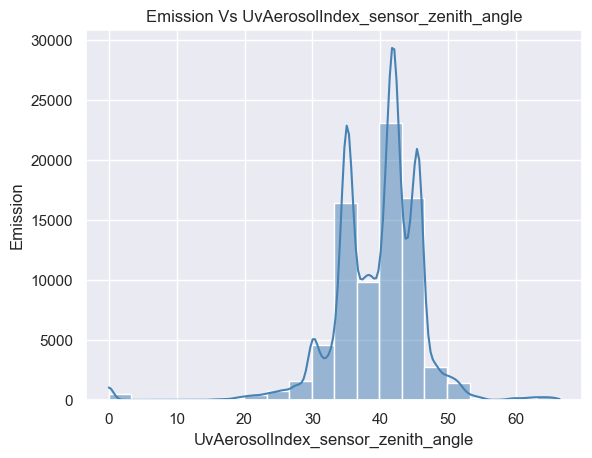

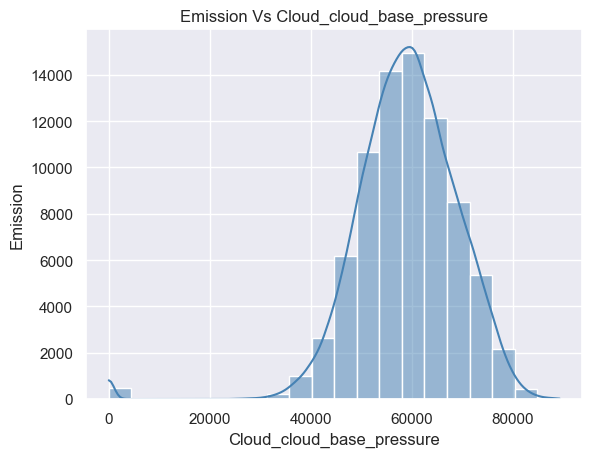

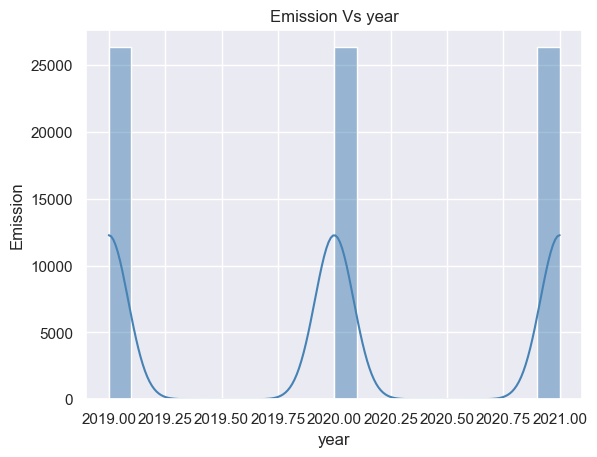

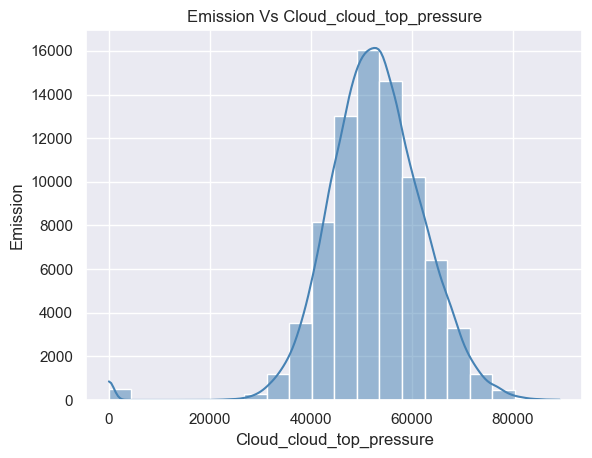

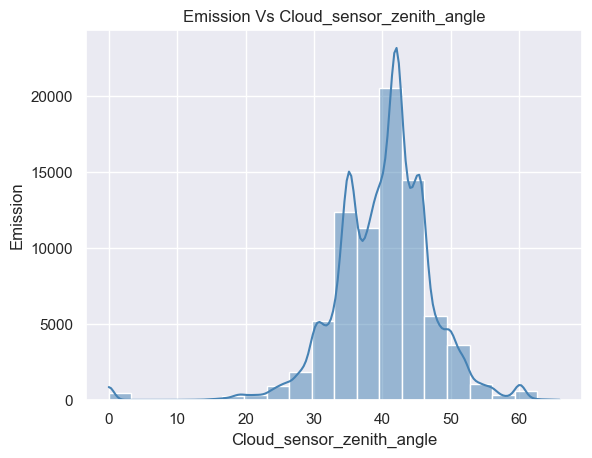

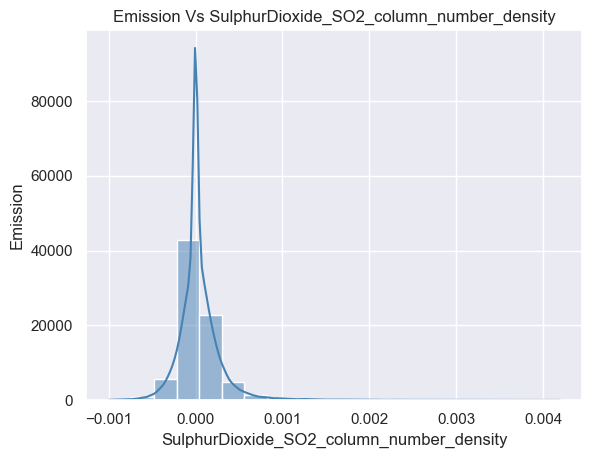

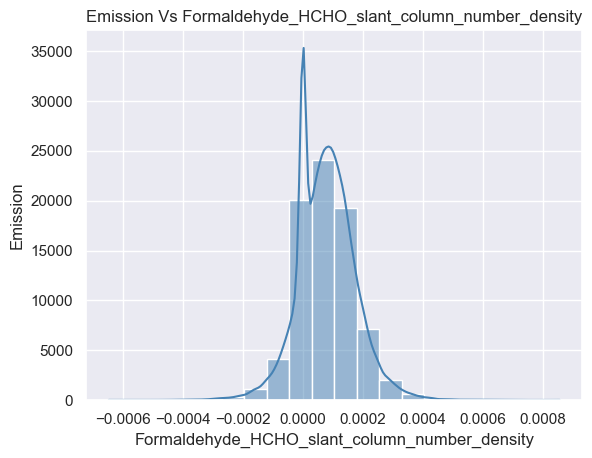

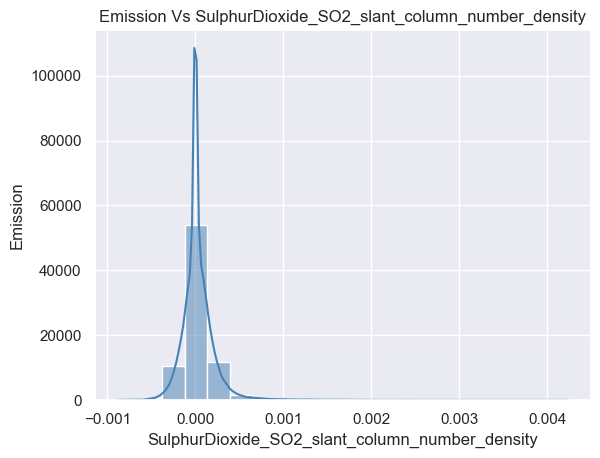

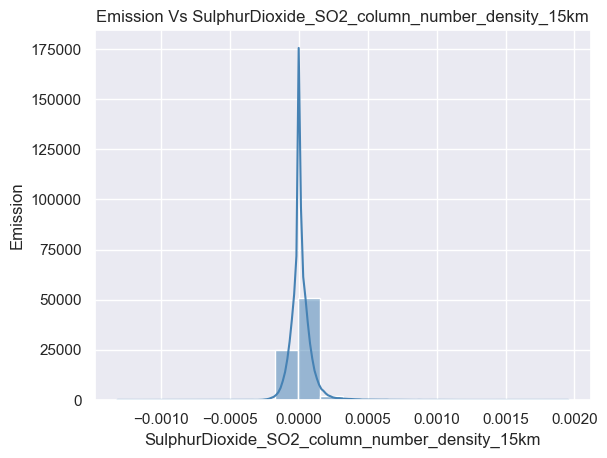

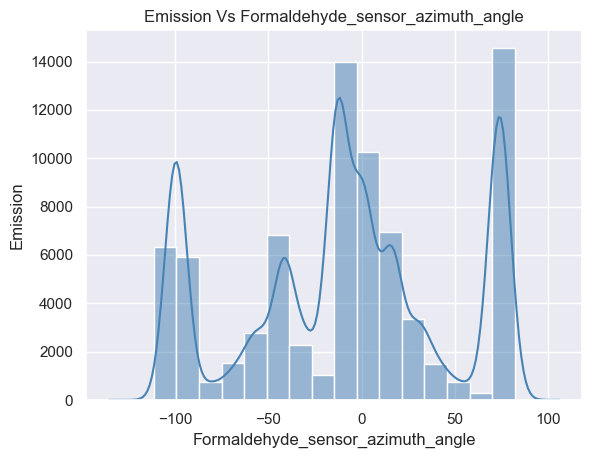

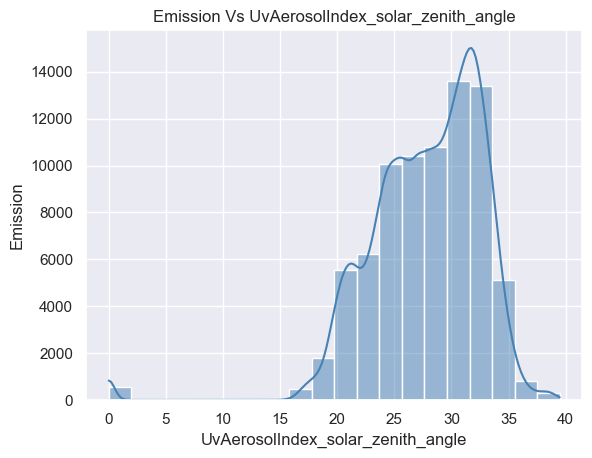

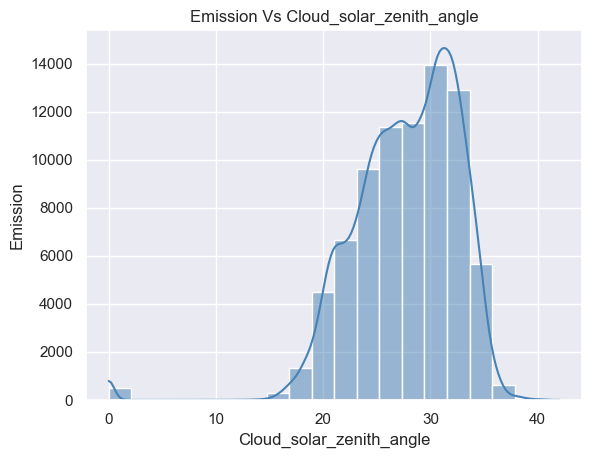

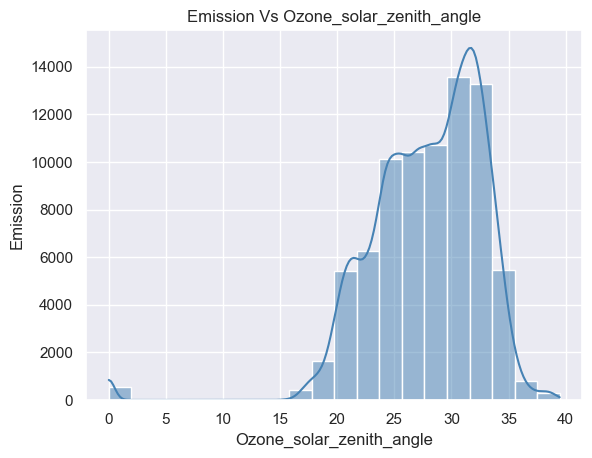

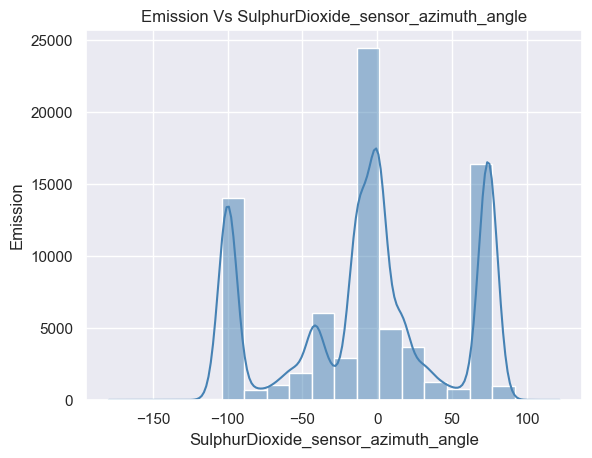

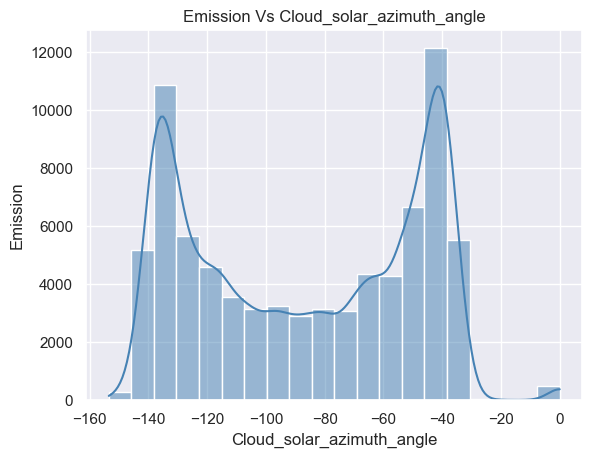

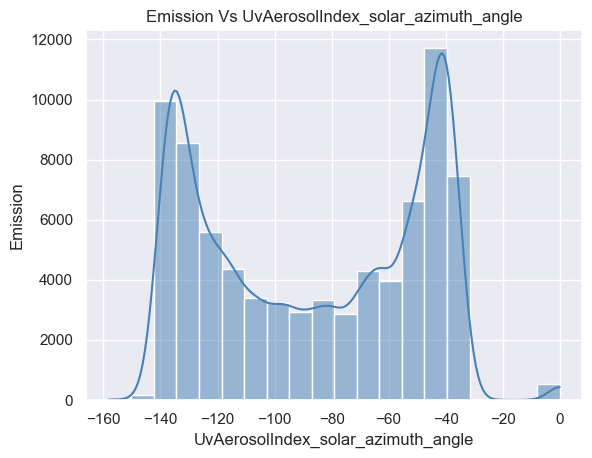

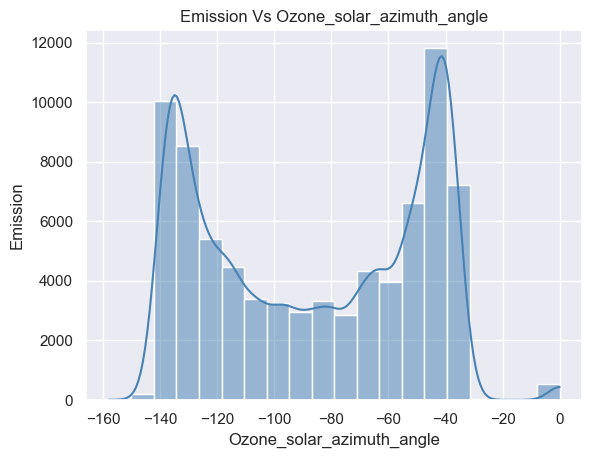

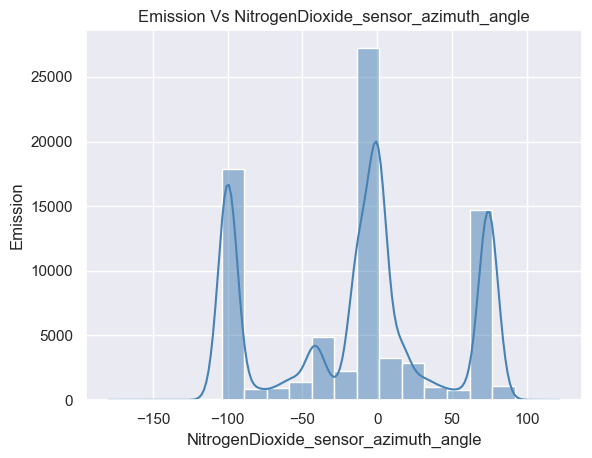

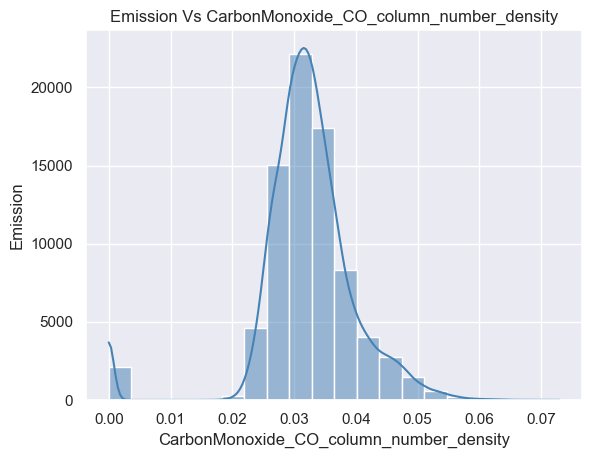

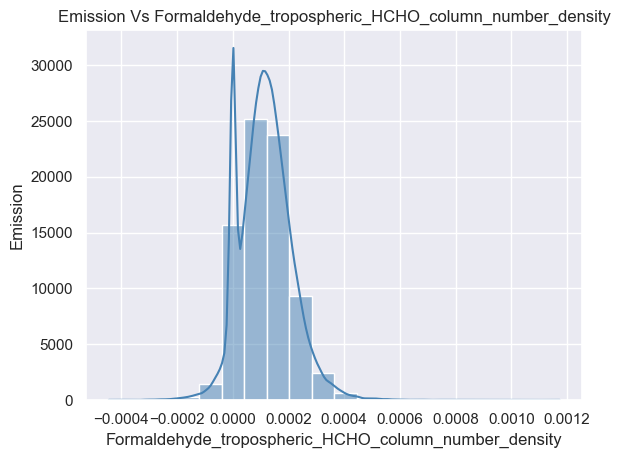

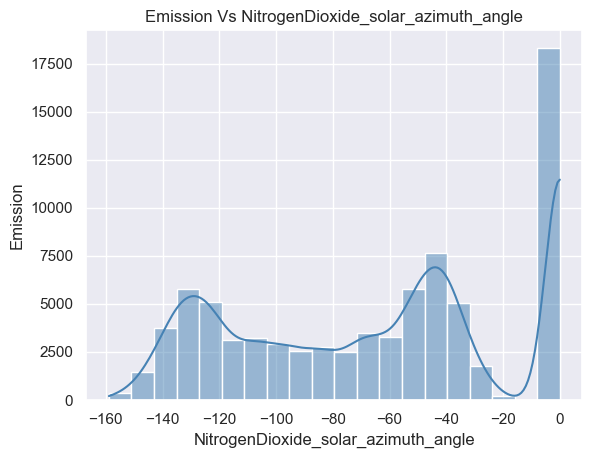

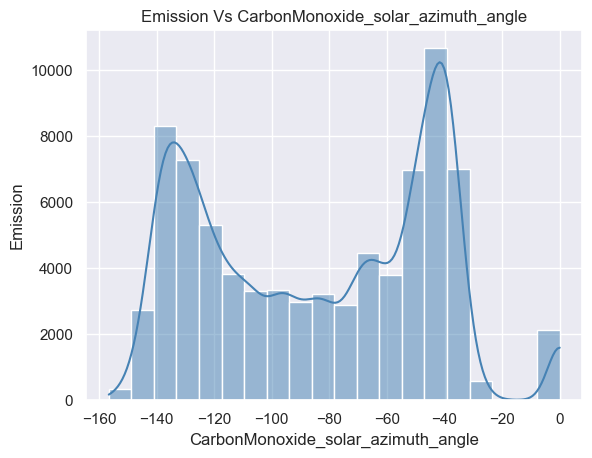

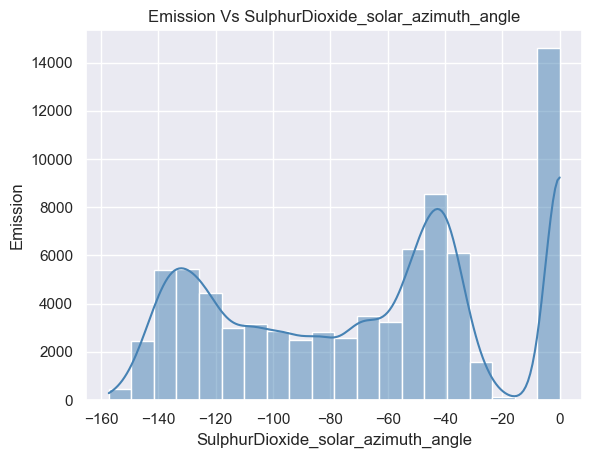

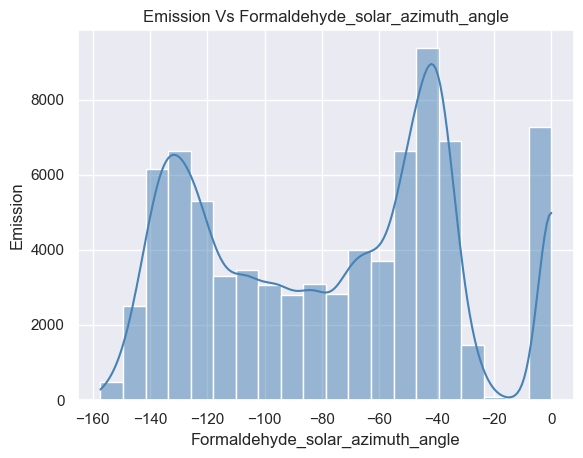

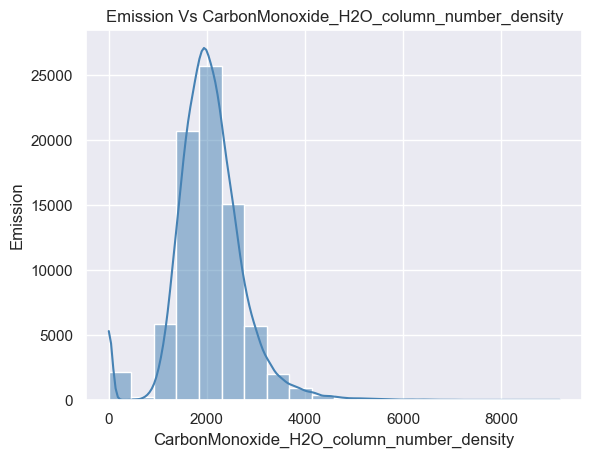

In [14]:
# remove 'emission' from our features variable, it's job is done
features = features.drop('emission')
# plotting a histplot using seaborn of each feature without emission
for feature in features:
    plt.figure()
    sns.histplot(df_filled[feature], bins=20 , kde=True, color='steelblue')
    plt.title(f'Emission Vs {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Emission')
    plt.show()
    

In [15]:
# splitting data into training and testing
X = df_filled.drop('emission', axis=1)
y = df_filled['emission']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model

In [16]:
# creating pipeline for Random Forest with StandardScaler, PolynomialFeatures
rf_pipe = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor( min_samples_split=3, min_samples_leaf=2,n_jobs=-1,random_state=42, min_impurity_decrease=0.0001)),
])
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()), ('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(min_impurity_decrease=0.0001,
                                       min_samples_leaf=2, min_samples_split=3,
                                       n_jobs=-1, random_state=42))])

#### Now let us evaluate the model!

In [17]:
# predict on test data
y_pred = rf_pipe.predict(X_test)
# calculate r2 score
r2 = r2_score(y_test, y_pred)
# print r2 score
print("r2 score of test data:", r2)
# print mean squared error
print("RMSE of test data:", np.sqrt(mean_squared_error(y_test, y_pred)))

r2 score of test data: 0.9622350337149883
RMSE of test data: 24.926666556550177


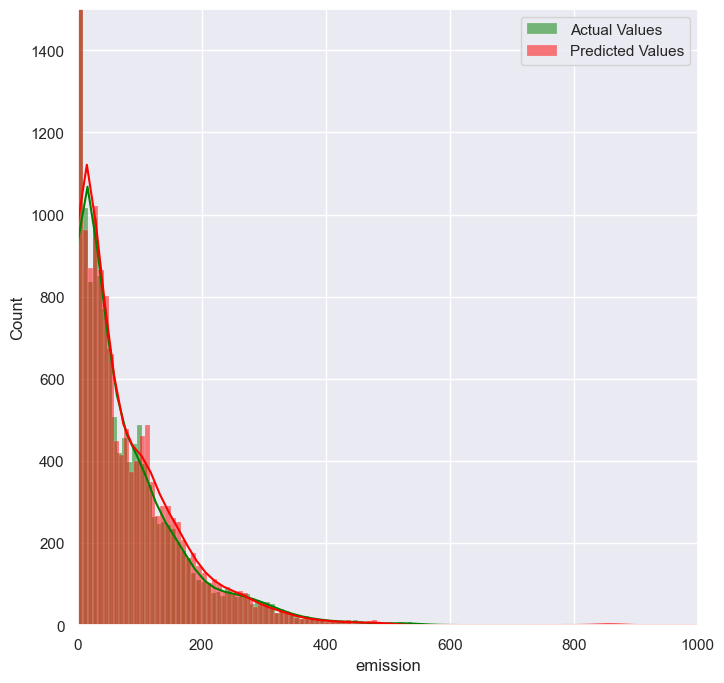

In [18]:
# Plotting prediction vs actual values with different colors using seaborn
plt.figure(figsize=(8, 8))
sns.histplot(y_test, color='green', label='Actual Values', kde=True)
sns.histplot(y_pred, color='red', label='Predicted Values', kde=True)
plt.axis([0, 1000, 0, 1500])
plt.legend()
plt.show()


## Testing our model on 'test.csv' data

In [19]:
df_test

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0      ID_-0.510_29.290_2022_00    -0.510     29.290  2022        0   
1      ID_-0.510_29.290_2022_01    -0.510     29.290  2022        1   
2      ID_-0.510_29.290_2022_02    -0.510     29.290  2022        2   
3      ID_-0.510_29.290_2022_03    -0.510     29.290  2022        3   
4      ID_-0.510_29.290_2022_04    -0.510     29.290  2022        4   
...                         ...       ...        ...   ...      ...   
24348  ID_-3.299_30.301_2022_44    -3.299     30.301  2022       44   
24349  ID_-3.299_30.301_2022_45    -3.299     30.301  2022       45   
24350  ID_-3.299_30.301_2022_46    -3.299     30.301  2022       46   
24351  ID_-3.299_30.301_2022_47    -3.299     30.301  2022       47   
24352  ID_-3.299_30.301_2022_48    -3.299     30.301  2022       48   

       SulphurDioxide_SO2_column_number_density  \
0                                           NaN   
1                                      0.000456   
2                                      0.000161   
3                                      0.000350   
4                                     -0.000317   
...                                         ...   
24348                                 -0.000618   
24349                                       NaN   
24350                                       NaN   
24351                                  0.000071   
24352                                       NaN   

       SulphurDioxide_SO2_column_number_density_amf  \
0                                               NaN   
1                                          0.691164   
2                                          0.605107   
3                                          0.696917   
4                                          0.580527   
...                                             ...   
24348                                      0.745549   
24349                                           NaN   
24350                                           NaN   
24351                                      1.003805   
24352                                           NaN   

       SulphurDioxide_SO2_slant_column_number_density  \
0                                                 NaN   
1                                            0.000316   
2                                            0.000106   
3                                            0.000243   
4                                           -0.000184   
...                                               ...   
24348                                       -0.000461   
24349                                             NaN   
24350                                             NaN   
24351                                        0.000077   
24352                                             NaN   

       SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
0                                NaN                                  NaN   
1                           0.000000                            76.239196   
2                           0.079870                           -42.055341   
3                           0.201028                            72.169566   
4                           0.204352                            76.190865   
...                              ...                                  ...   
24348                       0.234492                            72.306198   
24349                            NaN                                  NaN   
24350                            NaN                                  NaN   
24351                       0.205077                            74.327427   
24352                            NaN                                  NaN   

       ...  Cloud_cloud_top_pressure  Cloud_cloud_top_height  \
0      ...              36022.027344             8472.313477   
1      ...              48539.737242             6476.147323   
2      ...              34133.080469             8984.795703   
3      ...        

In [20]:
df_test.drop('ID_LAT_LON_YEAR_WEEK', axis=1, inplace=True)

In [21]:
# fill null values with 0
df_test.fillna(0, inplace=True)
df_test_filled = df_test[:]
df_test_filled.isnull().sum()

latitude                                    0
longitude                                   0
year                                        0
week_no                                     0
SulphurDioxide_SO2_column_number_density    0
                                           ..
Cloud_surface_albedo                        0
Cloud_sensor_azimuth_angle                  0
Cloud_sensor_zenith_angle                   0
Cloud_solar_azimuth_angle                   0
Cloud_solar_zenith_angle                    0
Length: 74, dtype: int64

In [22]:
df_test_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24353 entries, 0 to 24352
Data columns (total 74 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   latitude                                                  24353 non-null  float64
 1   longitude                                                 24353 non-null  float64
 2   year                                                      24353 non-null  int64  
 3   week_no                                                   24353 non-null  int64  
 4   SulphurDioxide_SO2_column_number_density                  24353 non-null  float64
 5   SulphurDioxide_SO2_column_number_density_amf              24353 non-null  float64
 6   SulphurDioxide_SO2_slant_column_number_density            24353 non-null  float64
 7   SulphurDioxide_cloud_fraction                             24353 non-null  float64
 8   SulphurDioxide_s

In [23]:
df_test_filled.head(10)

latitude  longitude  year  week_no  \
0     -0.51      29.29  2022        0   
1     -0.51      29.29  2022        1   
2     -0.51      29.29  2022        2   
3     -0.51      29.29  2022        3   
4     -0.51      29.29  2022        4   
5     -0.51      29.29  2022        5   
6     -0.51      29.29  2022        6   
7     -0.51      29.29  2022        7   
8     -0.51      29.29  2022        8   
9     -0.51      29.29  2022        9   

   SulphurDioxide_SO2_column_number_density  \
0                                  0.000000   
1                                  0.000456   
2                                  0.000161   
3                                  0.000350   
4                                 -0.000317   
5                                  0.000145   
6                                 -0.000189   
7                                  0.000000   
8                                  0.000000   
9                                 -0.000005   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                      0.000000   
1                                      0.691164   
2                                      0.605107   
3                                      0.696917   
4                                      0.580527   
5                                      0.683061   
6                                      0.811673   
7                                      0.000000   
8                                      0.000000   
9                                      0.726941   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                        0.000000   
1                                        0.000316   
2                                        0.000106   
3                                        0.000243   
4                                       -0.000184   
5                                        0.000099   
6                                       -0.000154   
7                                        0.000000   
8                                        0.000000   
9                                        0.000008   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
0                       0.000000                             0.000000   
1                       0.000000                            76.239196   
2                       0.079870                           -42.055341   
3                       0.201028                            72.169566   
4                       0.204352                            76.190865   
5                       0.151796                            73.466652   
6                       0.282807                            72.760193   
7                       0.000000                             0.000000   
8                       0.000000                             0.000000   
9                       0.103913                           -13.603258   

   SulphurDioxide_sensor_zenith_angle  ...  Cloud_cloud_top_pressure  \
0                            0.000000  ...              36022.027344   
1                           15.600607  ...              48539.737242   
2                           39.889060  ...              34133.080469   
3                           58.862543  ...              50854.991076   
4                           15.646016  ...              46594.685145   
5                           46.281410  ...              54067.517014   
6                           53.209396  ...              50878.114067   
7                            0.000000  ...              33372.224148   
8                            0.000000  ...              42174.692897   
9                           45.952704  ...              41651.130208   

   Cloud_cloud_top_height  Cloud_cloud_base_pressure  Cloud_cloud_base_height  \
0             8472.313477               41047.937500              7472.313477   
1             6476.147323               54915.708579              5476.147161   
2             8984.795703               39006.0

In [24]:
#load our features
Test_X = df_test_filled[:]
Test_X

latitude  longitude  year  week_no  \
0        -0.510     29.290  2022        0   
1        -0.510     29.290  2022        1   
2        -0.510     29.290  2022        2   
3        -0.510     29.290  2022        3   
4        -0.510     29.290  2022        4   
...         ...        ...   ...      ...   
24348    -3.299     30.301  2022       44   
24349    -3.299     30.301  2022       45   
24350    -3.299     30.301  2022       46   
24351    -3.299     30.301  2022       47   
24352    -3.299     30.301  2022       48   

       SulphurDioxide_SO2_column_number_density  \
0                                      0.000000   
1                                      0.000456   
2                                      0.000161   
3                                      0.000350   
4                                     -0.000317   
...                                         ...   
24348                                 -0.000618   
24349                                  0.000000   
24350                                  0.000000   
24351                                  0.000071   
24352                                  0.000000   

       SulphurDioxide_SO2_column_number_density_amf  \
0                                          0.000000   
1                                          0.691164   
2                                          0.605107   
3                                          0.696917   
4                                          0.580527   
...                                             ...   
24348                                      0.745549   
24349                                      0.000000   
24350                                      0.000000   
24351                                      1.003805   
24352                                      0.000000   

       SulphurDioxide_SO2_slant_column_number_density  \
0                                            0.000000   
1                                            0.000316   
2                                            0.000106   
3                                            0.000243   
4                                           -0.000184   
...                                               ...   
24348                                       -0.000461   
24349                                        0.000000   
24350                                        0.000000   
24351                                        0.000077   
24352                                        0.000000   

       SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
0                           0.000000                             0.000000   
1                           0.000000                            76.239196   
2                           0.079870                           -42.055341   
3                           0.201028                            72.169566   
4                           0.204352                            76.190865   
...                              ...                                  ...   
24348                       0.234492                            72.306198   
24349                       0.000000                             0.000000   
24350                       0.000000                             0.000000   
24351                       0.205077                            74.327427   
24352                       0.000000                             0.000000   

       SulphurDioxide_sensor_zenith_angle  ...  Cloud_cloud_top_pressure  \
0                                0.000000  ...              36022.027344   
1                               15.600607  ...              48539.737242   
2                               39.889060  ...              34133.080469   
3                               58.862543  ...              50854.991076   
4                               15.646016  ...              46594.685145   
...                                   ...  ...                       ...   
24348                           61.114494  ...    

In [25]:
# predict on test data
Pred_y = rf_pipe.predict(Test_X)

In [26]:
Pred_y

array([23.98325591,  4.24637564,  4.25640333, ..., 26.60706102,
       27.9484682 , 25.85140656])

In [27]:
df_test_org = pd.read_csv('test.csv')

#### There are some few errors like the first row here but the rest of the results are quite solid

In [28]:
# # Create a submission file
submission_file = pd.DataFrame({'ID_LAT_LON_YEAR_WEEK': df_test_org.ID_LAT_LON_YEAR_WEEK, 'emission': Pred_y})
submission_file.head(20)

ID_LAT_LON_YEAR_WEEK   emission
0   ID_-0.510_29.290_2022_00  23.983256
1   ID_-0.510_29.290_2022_01   4.246376
2   ID_-0.510_29.290_2022_02   4.256403
3   ID_-0.510_29.290_2022_03   4.241093
4   ID_-0.510_29.290_2022_04   4.225826
5   ID_-0.510_29.290_2022_05   4.276708
6   ID_-0.510_29.290_2022_06   4.253516
7   ID_-0.510_29.290_2022_07   4.055117
8   ID_-0.510_29.290_2022_08   4.134957
9   ID_-0.510_29.290_2022_09   4.280913
10  ID_-0.510_29.290_2022_10   4.280325
11  ID_-0.510_29.290_2022_11   4.085496
12  ID_-0.510_29.290_2022_12   4.203828
13  ID_-0.510_29.290_2022_13   4.187481
14  ID_-0.510_29.290_2022_14   4.155969
15  ID_-0.510_29.290_2022_15   4.261103
16  ID_-0.510_29.290_2022_16   4.105857
17  ID_-0.510_29.290_2022_17   4.030383
18  ID_-0.510_29.290_2022_18   4.048582
19  ID_-0.510_29.290_2022_19   4.117788

## Saving our file for submission !

In [29]:
# save submission file
submission_file.to_csv('submission.csv', index=False)

## Our job here is Done !